# <font color='red'>Employee Attrition Analysis</font>

# <font color='orange'>Domain:Human Resource</font>

# <font color='yellow'>Problem Statement:
XYZ company which was established a few years back is facing around a 15% attrition rate for
a couple of years. And it's majorly affecting the company in many aspects. In order to
understand why employees are leaving the company and reduce the attrition rate XYZ
company has approached an HR analytics consultancy for analyzing the data they have. You
are playing the HR analyst role in this project and building a dashboard which can help the
organization in making data-driven decisions.</font>

# <font color='blue'>Import Necessary Libraries</font>

In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency,ttest_ind, f_oneway
import statsmodels.api as sm

## <font color='blue'>Table of Contents</font>

### <font color='blue'>Import Necessary Libraries</font>
### <font color='blue'>Exploratory Data Analysis</font>
- #### <font color='Red'>Employee Attrition Dataset</font>
#### <font color = 'green'>1. **General Analysis**</font>
#### <font color = 'green'>2. **Demographic Analysis**</font>
#### <font color = 'green'>3. **Departmental Analysis**</font>
#### <font color = 'green'>4. **Job Satisfaction and Involvement**</font>
#### <font color = 'green'>5. **Work-Life Balance**</font>
#### <font color = 'green'>6. **Performance and Rewards**</font>
#### <font color = 'green'>7. **Experience and Career Growth**</font>
#### <font color = 'green'>8. **Compensation Analysis**</font>
#### <font color = 'green'>9. **Geographic Factors**</font>
#### <font color = 'green'>10. **Educational Background**</font>
#### <font color = 'green'>11. **Company Tenure**</font>
#### <font color = 'green'>12. **Work Environment**</font>
#### <font color = 'green'>13. **Job Level and Progression**</font>
#### <font color = 'green'>14. **Company Changes**</font>
#### <font color = 'green'>15. **Predictive Analysis**</font>
#### <font color = 'green'>16. **Statistical Analysis**</font>
#### <font color = 'green'>17. **Visualization**</font>
#### <font color = 'green'>18. **Correlation and Causation**</font>
#### <font color = 'green'>19. **Survey Insights**</font>
#### <font color = 'green'>20. **Actionable Insights**</font>
#### <font color = 'green'>21. **Comparative Analysis**</font>
#### <font color = 'green'>22. **Employee Feedback**</font>


## <font color='green'>Exploratory Data Analysis</font>

### <font color='dark blue'>Description of each Column Represents</font>
##### <font color='blue'>Age:</font>Age of the employee.
##### <font color='blue'>Attrition:</font>Whether the employee has left the company.
##### <font color='blue'>Business Travel: </font>Frequency of business travel.
##### <font color='blue'>Department:</font>Department where the employee works.
##### <font color='blue'>Distance From Home:</font>Distance between the employee's home and workplace.
##### <font color='blue'>Education:</font>Level of education.
##### <font color='blue'>Education Field:</font>Field of education.
##### <font color='blue'>EmployeeCount:</font>Count of employees.
##### <font color='blue'>Gender:</font>Gender of the employee (Male/Female).
##### <font color='blue'>Job Level: </font>Job level of the employee.
##### <font color='blue'>Job Role:</font>Role of the employee within the Company.
##### <font color='blue'>Marital Status:</font>Marital status of the employee.
##### <font color='blue'>Monthly Income:</font>Monthly income of the employee.
##### <font color='blue'>Num Companies Worked:</font>Number of companies the employee has worked for.
##### <font color='blue'>Over 18:</font>Whether the employee is over 18 years old.
##### <font color='blue'>Percent Salary Hike:</font>Percentage increase in salary.
##### <font color='blue'>Stock Option Level:</font>Stock option level of the employee.
##### <font color='blue'>Total Working Years: </font>Total years the employee has worked.
##### <font color='blue'>Training Times Last Year:</font>Number of training sessions attended last year.
##### <font color='blue'>Years at Company:</font>Number of years the employee has been at the company.
##### <font color='blue'>Years Since Last Promotion:</font>Number of years since the employee's last promotion.
##### <font color='blue'>Years With CurrManager:</font>Number of years the employee has worked with their current manager.
##### <font color='blue'>Environment Satisfaction:</font>Satisfaction with the work environment.
##### <font color='blue'>Job Satisfaction:</font>Satisfaction with the job.
##### <font color='blue'>Work Life Balance:</font>Work-life balance satisfaction.
##### <font color='blue'>Job Involvement:</font>Involvement in the job.
##### <font color='blue'>Performance Rating:</font>Performance rating.

In [120]:
df = pd.read_csv('Attrition data.csv')
df

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [121]:
#shows the 1st 5 rows of the datafrme
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [122]:
#show the columns presnt if the dataframe
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [123]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {df.shape}")
totalrows = df.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (4410, 29)
 Total number of rows in the dataset =  4410


In [124]:
#show the complete infromation about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [125]:
#Remove EmployeeID
df.drop('EmployeeID',axis=1,inplace=True)
df.drop('EmployeeCount',axis=1,inplace=True) #droped Because all entry are cover with value(1)
df.drop('StandardHours',axis=1,inplace=True) #Droped because all the workers are workde maximum of 8 hours

In [126]:
#Describe about the data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,4410.0,0.793878,0.851883,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,4401.0,11.279936,7.782222,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,4410.0,2.799320,1.288978,0.0,2.0,3.0,3.0,6.0


In [127]:
#chescking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [128]:
#filing Null Columns with Mean
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean())
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mean())
df['JobSatisfaction'] = df['JobSatisfaction'].fillna(df['JobSatisfaction'].mean())
df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mean())

In [129]:
#Cheacking Duplicates Records and drop Them
df.duplicated().sum()

2837

## <font color = 'green'>1. **General Analysis:**

### <font color='purple'>Overall Attrition Rate in the Company</font>

In [130]:
attrition_rate = df['Attrition'].value_counts(normalize=True)['Yes']* 100
print(f"The Overall Attritiion Rate in the Company is {attrition_rate:.2f}%")

The Overall Attritiion Rate in the Company is 16.12%


### <font color='purple'>Distribution of Age among Employees, and does Age affect Attrition Rates</font>

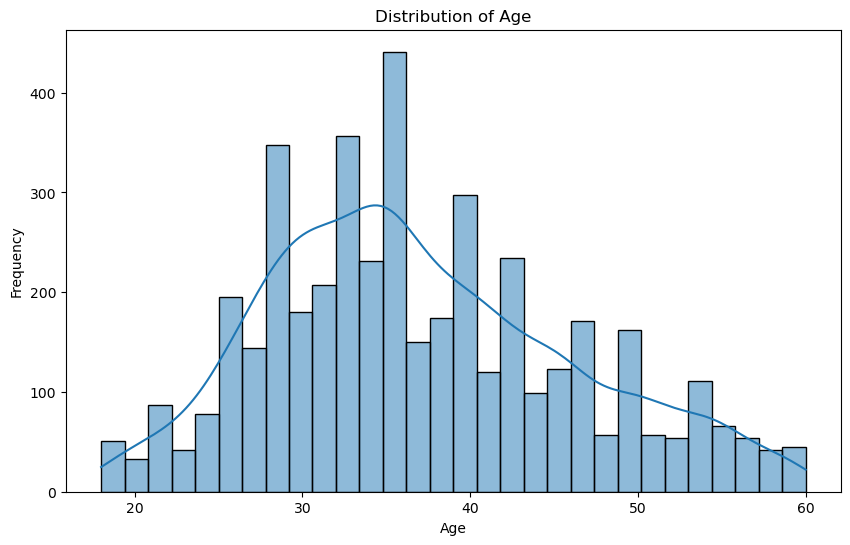

In [131]:
#disttribution of age
plt.figure(figsize = (10,6))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

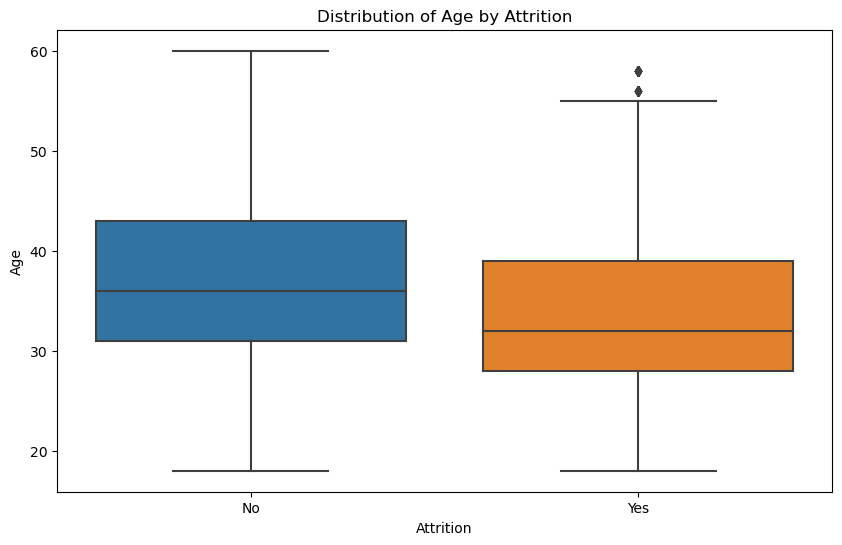

In [132]:
#age vs Attrition
plt.figure(figsize = (10,6))
sns.boxplot(x='Attrition',y='Age',data=df)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

## <font color = 'green'>2. **Demographic Analysis:**

### <font color='purple'>Difference in Attrition Rates between Male and Female Employees</font>

In [133]:
#contingency table
contingency_table = pd.crosstab(df['Gender'], df['Attrition'])
contingency_table

Attrition,No,Yes
Gender,,
Female,1494,270
Male,2205,441


### <font color='purple'>Marital Status impact Employee Attrition</font>

In [134]:
#Create Contingency Table
contingency_table = pd.crosstab(df['MaritalStatus'], df['Attrition'])
contingency_table

Attrition,No,Yes
MaritalStatus,,
Divorced,882,99
Married,1767,252
Single,1050,360


### <font color = 'green'>3. **Departmental Analysis:**

### <font color='purple'>Departments have the Highest and Lowest Attrition rates</font>

In [135]:
#Attrition rates by departmnet
attrition_counts = df[df['Attrition'] == 'Yes'].groupby('Department').size()
total_counts = df.groupby('Department').size()
attrition_rates = (attrition_counts / total_counts) * 100
attrition_rates

Department
Human Resources           30.158730
Research & Development    15.712799
Sales                     15.022422
dtype: float64

In [136]:
#departmnet with the highest and lowest attrition rates
highest_attrition_department = attrition_rates.idxmax()
lowest_attrition_department = attrition_rates.idxmin()

In [137]:
highest_attrition_rate = attrition_rates.max()
lowest_attrition_rate = attrition_rates.min()

In [138]:
highest_attrition_department, highest_attrition_rate, lowest_attrition_department, lowest_attrition_rate

('Human Resources', 30.158730158730158, 'Sales', 15.022421524663676)

### <font color='purple'>Attrition Rate vary by Job Role within Departments</font>

In [139]:
attrition_counts = df[df['Attrition'] == 'Yes'].groupby(['Department', 'JobRole']).size()
total_counts = df.groupby(['Department', 'JobRole']).size()
attrition_rates = (attrition_counts / total_counts) * 100

In [140]:
attrition_rates_df = attrition_rates.reset_index(name='Attrition Rate')

In [141]:
attrition_rates_df

,Department,JobRole,Attrition Rate
0,Human Resources,Healthcare Representative,33.333333
1,Human Resources,Human Resources,NaN
2,Human Resources,Laboratory Technician,46.153846
3,Human Resources,Manager,33.333333
4,Human Resources,Manufacturing Director,25.000000
5,Human Resources,Research Director,NaN
6,Human Resources,Research Scientist,8.333333
7,Human Resources,Sales Executive,44.444444
8,Human Resources,Sales Representative,NaN
9,Research & Development,Healthcare Representative,8.045977


## <font color = 'green'>4. **Job Satisfaction and Involvement:**

### <font color='purple'>Job Satisfaction Correlate with Employee Attrition</font>

In [142]:
#convert attrition to numerical values
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [143]:
#Attrition rates by job satisfaction level
attrition_rates = df.groupby('JobSatisfaction')['Attrition'].mean() * 100
attrition_rates

JobSatisfaction
1.000000    22.906977
2.000000    16.428571
2.728246     5.000000
3.000000    16.553288
4.000000    11.411851
Name: Attrition, dtype: float64

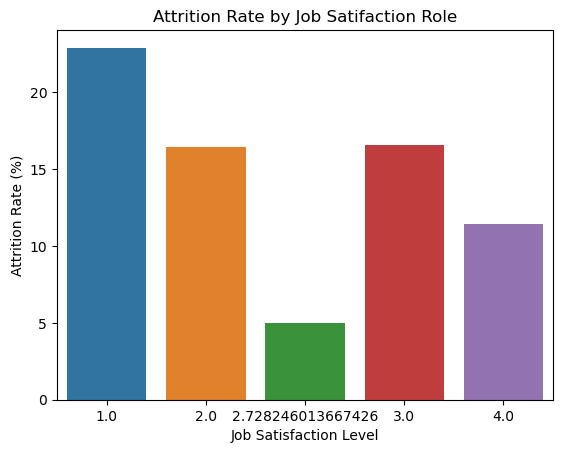

In [144]:
#vusualize attrition rates by job satisfaction
sns.barplot(x=attrition_rates.index,y=attrition_rates.values)
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Job Satifaction Role')
plt.show()

### <font color='purple'>Job Involvement Influence the likelihood of an Employee Leaving</font>

In [145]:
#attrition rates by job involvement level
attrition_rates = df.groupby('JobInvolvement')['Attrition'].mean() * 100
attrition_rates

JobInvolvement
1    21.686747
2    16.000000
3    15.322581
4    18.055556
Name: Attrition, dtype: float64

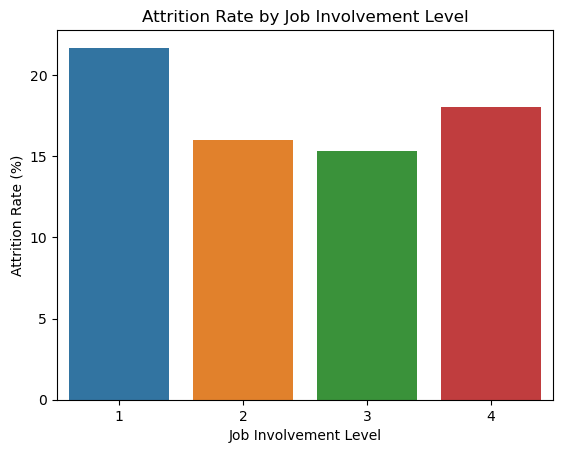

In [146]:
# Visualize the attrition rates by job involvement
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Job Involvement Level')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Job Involvement Level')
plt.show()

## <font color = 'green'>5. **Work-Life Balance:**

### <font color='purple'>Relationship Between Work-Life Balance and Attrition Rates</font>

In [147]:
#attrition rates by work-life balance level
attrition_rates = df.groupby('WorkLifeBalance')['Attrition'].mean() * 100
attrition_rates

WorkLifeBalance
1.000000    31.380753
2.000000    16.781158
2.761436    10.526316
3.000000    14.285714
4.000000    17.841410
Name: Attrition, dtype: float64

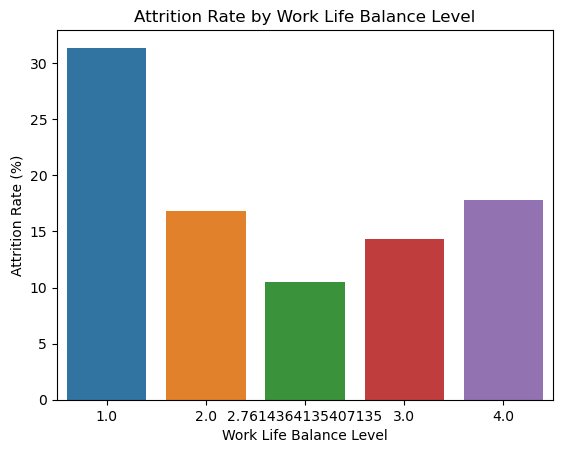

In [148]:
# Visualize the attrition rates by work-life balance
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Work Life Balance Level')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Work Life Balance Level')
plt.show()

### <font color='purple'>Number of Training Times Last Year impact Work-Life Balance and Attrition</font>

In [149]:
# Analyze relationship between training times and work-life balance
work_life_balance_avg = df.groupby('TrainingTimesLastYear')['WorkLifeBalance'].mean()

In [150]:
# Analyze relationship between training times and attrition
attrition_rates = df.groupby('TrainingTimesLastYear')['Attrition'].mean() * 100

In [151]:
# Perform correlation test
correlation_wlb, p_value_wlb = stats.pearsonr(df['TrainingTimesLastYear'], df['WorkLifeBalance'])
correlation_attrition, p_value_attrition = stats.pearsonr(df['TrainingTimesLastYear'], df['Attrition'])

In [152]:
work_life_balance_avg, attrition_rates, correlation_wlb, p_value_wlb, correlation_attrition, p_value_attrition

(TrainingTimesLastYear
 0    2.757787
 1    2.721885
 2    2.768227
 3    2.784531
 4    2.751448
 5    2.675198
 6    2.752857
 Name: WorkLifeBalance, dtype: float64,
 TrainingTimesLastYear
 0    18.518519
 1    14.084507
 2    17.184644
 3    17.515275
 4    13.008130
 5    14.285714
 6     6.153846
 Name: Attrition, dtype: float64,
 -0.015714087961721745,
 0.2968060922027167,
 -0.049430576244253066,
 0.001024706191536548)

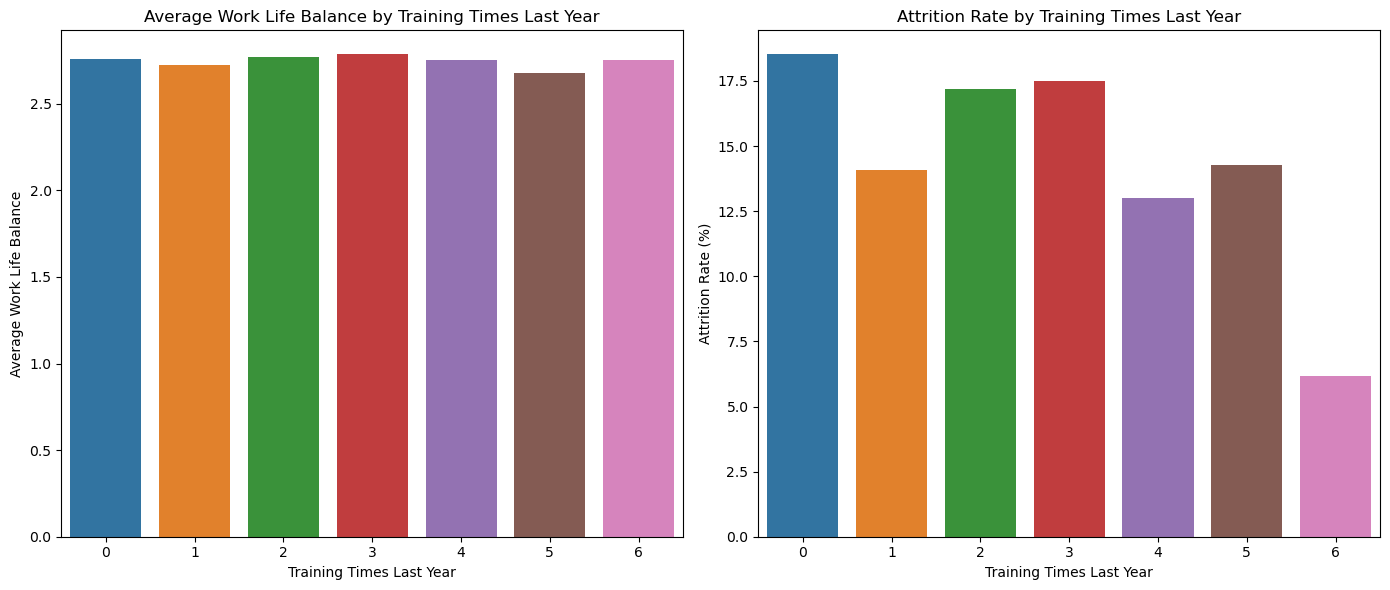

In [153]:
# Visualize the relationship between training times and work-life balance
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=work_life_balance_avg.index, y=work_life_balance_avg.values)
plt.xlabel('Training Times Last Year')
plt.ylabel('Average Work Life Balance')
plt.title('Average Work Life Balance by Training Times Last Year')

# Visualize the relationship between training times and attrition
plt.subplot(1, 2, 2)
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Training Times Last Year')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Training Times Last Year')

plt.tight_layout()
plt.show()

## <font color = 'green'>6. **Performance and Rewards:**

### <font color='purple'>Correlation between Performance Ratings and Attrition</font>

In [154]:
# Calculate attrition rates by performance rating
attrition_rates = df.groupby('PerformanceRating')['Attrition'].mean() * 100

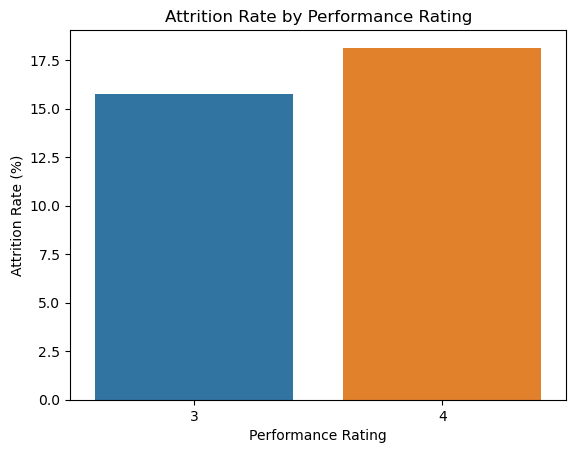

In [155]:
# Visualize the attrition rates by performance rating
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Performance Rating')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Performance Rating')
plt.show()

### <font color='purple'>Percent Salary Hike affect Employee Retention</font>

In [156]:
# Calculate attrition rates by percent salary hike
attrition_rates = df.groupby('PercentSalaryHike')['Attrition'].mean() * 100

In [157]:
# Perform correlation test
correlation, p_value = stats.pearsonr(df['PercentSalaryHike'], df['Attrition'])

In [158]:
attrition_rates, correlation, p_value

(PercentSalaryHike
 11    14.285714
 12    15.151515
 13    16.267943
 14    14.427861
 15    20.792079
 16    12.820513
 17    18.292683
 18    14.606742
 19    18.421053
 20    16.363636
 21    18.750000
 22    17.857143
 23    17.857143
 24    14.285714
 25    27.777778
 Name: Attrition, dtype: float64,
 0.032532594891052195,
 0.030743386433369824)

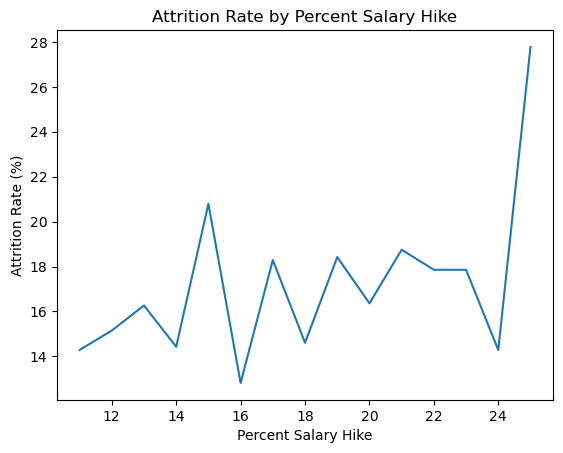

In [159]:
# Visualize the attrition rates by percent salary hike
sns.lineplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Percent Salary Hike')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Percent Salary Hike')
plt.show()

## <font color = 'green'>7. **Experience and Career Growth:**

### <font color='purple'>Relationship between Total Working Years and Attrition</font>

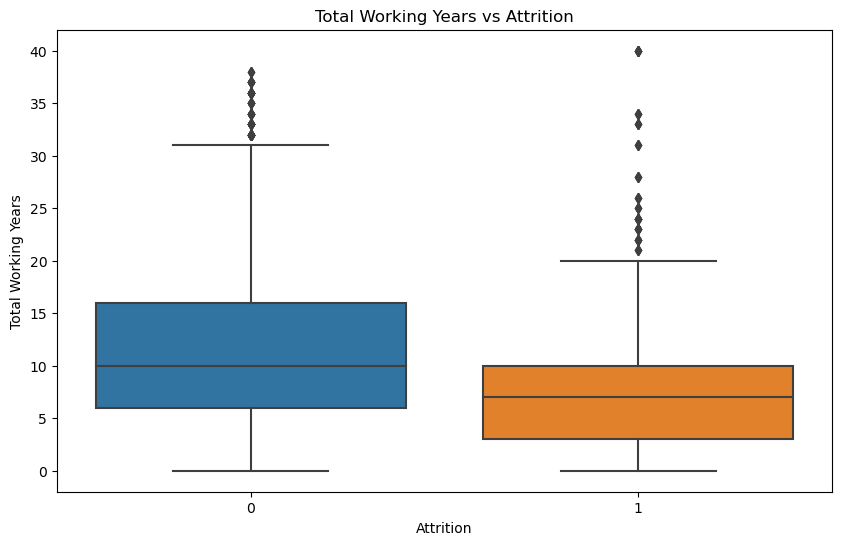

In [160]:
# Plot a boxplot to visualize the relationship between Total Working Years and Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df)
plt.title("Total Working Years vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Total Working Years")
plt.show()

### <font color='purple'>Number Years Since Last Promotion relate to Employee Attrition</font>

In [161]:
# Define the independent variable (X) and the dependent variable (y)
X = df["YearsSinceLastPromotion"]
y = df["Attrition"]

# Add constant to the independent variable (X) for the intercept term
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.441126
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4408
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                0.001289
Time:                        00:12:30   Log-Likelihood:                -1945.4
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                   0.02504
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.5870      0.049    -32.337      0.000      -1.683   

## <font color = 'green'>8. **Compensation Analysis:**

### <font color='purple'>Monthly Income impact the likelihood of an employee leaving</font>

In [162]:
# Calculate attrition rates by monthly income
attrition_rates = df.groupby(pd.cut(df['MonthlyIncome'], bins=5))['Attrition'].mean() * 100

In [163]:
# Perform correlation test (Spearman correlation due to non-linear relationship)
correlation, p_value = stats.spearmanr(df['MonthlyIncome'], df['Attrition'])

In [164]:
attrition_rates, correlation, p_value

(MonthlyIncome
 (9900.1, 48070.0]       16.246499
 (48070.0, 86050.0]      18.295739
 (86050.0, 124030.0]     12.650602
 (124030.0, 162010.0]    15.714286
 (162010.0, 199990.0]    13.223140
 Name: Attrition, dtype: float64,
 -0.024263918589899926,
 0.107159106521073)

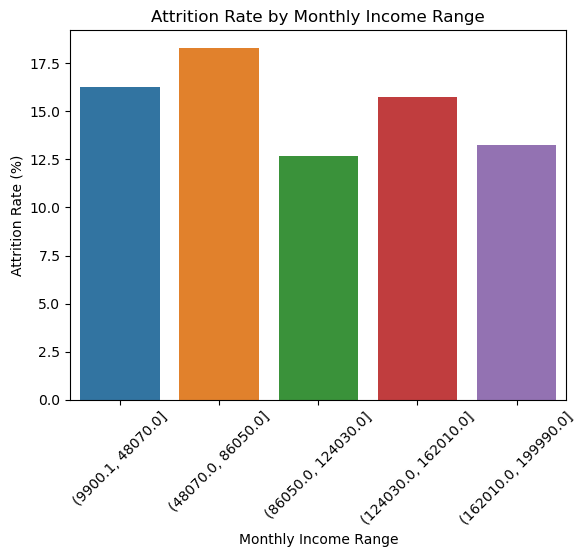

In [165]:
# Visualize the attrition rates by monthly income
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Monthly Income Range')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Monthly Income Range')
plt.xticks(rotation=45)
plt.show()

### <font color='purple'>Trend between Stock Option Levels and Attrition
</font>

In [166]:
# Calculate attrition rates by stock option level
attrition_rates = df.groupby('StockOptionLevel')['Attrition'].mean() * 100

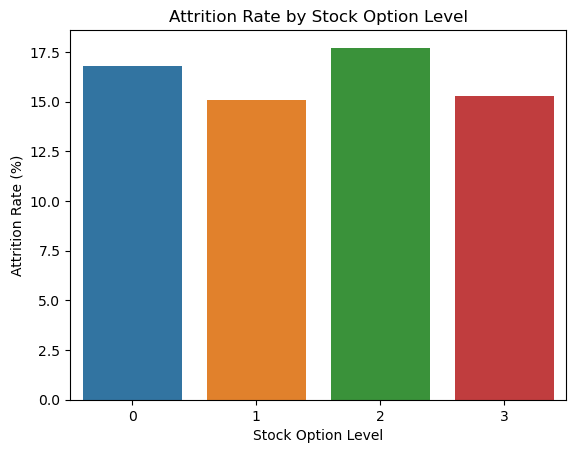

In [167]:
# Visualize the attrition rates by stock option level
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Stock Option Level')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Stock Option Level')
plt.show()

### <font color = 'green'>9. **Geographic Factors:**

### <font color='purple'>Distance from Home to the Workplace affect Employee Attrition</font>

In [168]:
# Calculate attrition rates by distance from home
attrition_rates = df.groupby(pd.cut(df['DistanceFromHome'], bins=5))['Attrition'].mean() * 100

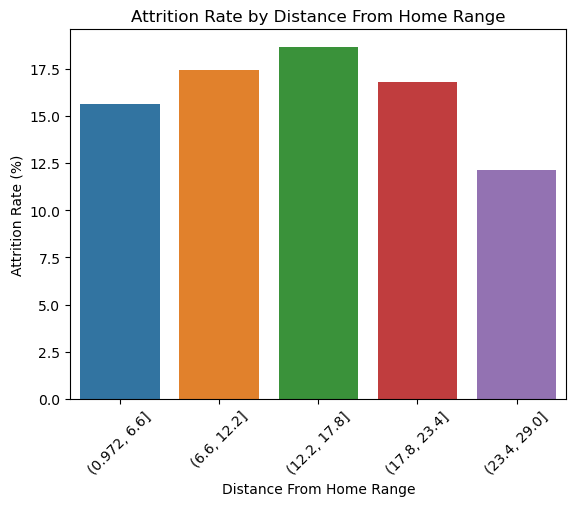

In [169]:
# Visualize the attrition rates by distance from home
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Distance From Home Range')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Distance From Home Range')
plt.xticks(rotation=45)
plt.show()

### <font color='purple'>Business Travel Frequency influence Attrition Rates</font>

In [170]:
# Calculate attrition rates by business travel frequency
attrition_rates = df.groupby('BusinessTravel')['Attrition'].mean() * 100

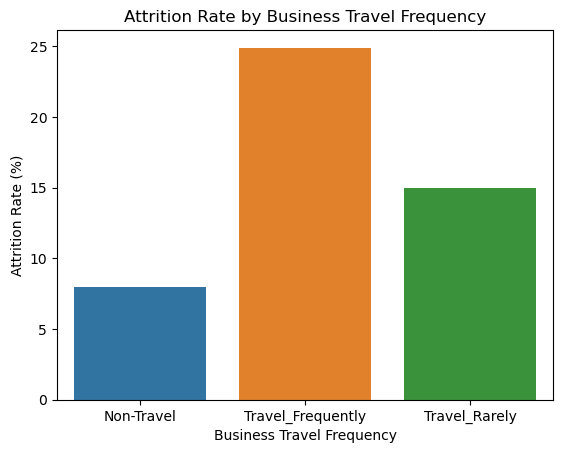

In [171]:
# Visualize the attrition rates by business travel frequency
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Business Travel Frequency')
plt.show()

### <font color = 'green'>10. **Educational Background:**

### <font color='purple'>Relationship between Education Level and Attrition</font>

In [172]:
# Calculate attrition rates by education level
attrition_rates = df.groupby('Education')['Attrition'].mean() * 100

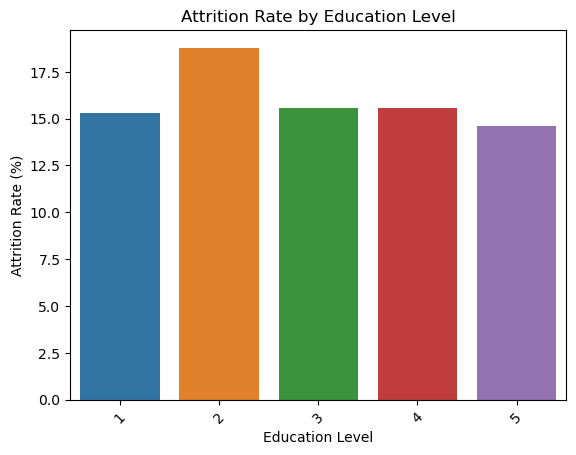

In [173]:
# Visualize the attrition rates by education level
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Education Level')
plt.xticks(rotation=45)
plt.show()

### <font color='purple'>Field of education have an impact on employee Attrition</font>

In [174]:
# Calculate attrition rates by education field
attrition_rates = df.groupby('EducationField')['Attrition'].mean() * 100

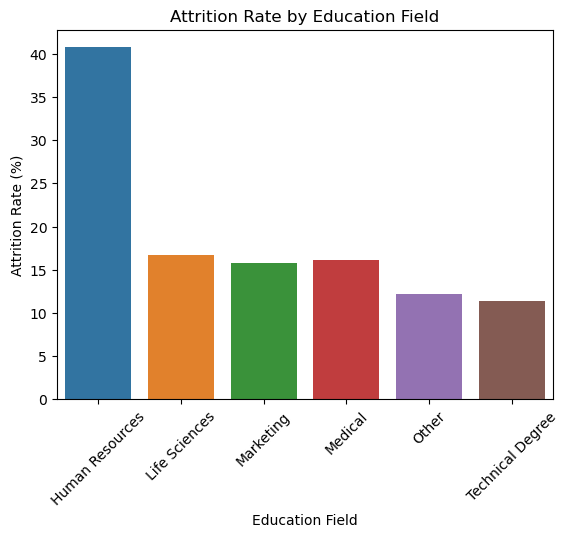

In [175]:
# Visualize the attrition rates by education field
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Education Field')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Education Field')
plt.xticks(rotation=45)
plt.show()

In [176]:
contingency_table = pd.crosstab(df['EducationField'], df['Attrition'])
contingency_table

Attrition,0,1
EducationField,,
Human Resources,48,33
Life Sciences,1515,303
Marketing,402,75
Medical,1167,225
Other,216,30
Technical Degree,351,45


### <font color = 'green'>11. **Company Tenure:**

### <font color='purple'>Number of Years an Employee has been with the Company Correlate with attrition</font>

In [177]:
# Calculate attrition rates by years at the company
attrition_rates = df.groupby('YearsAtCompany')['Attrition'].mean() * 100

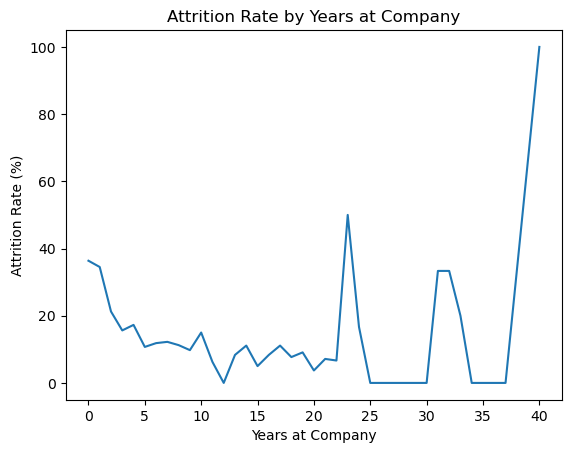

In [178]:
# Visualize the attrition rates by years at the company
sns.lineplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Years at Company')
plt.show()

In [179]:
# Perform correlation test (Spearman correlation due to non-linear relationship)
correlation, p_value = stats.spearmanr(df['YearsAtCompany'], df['Attrition'])

In [180]:
correlation, p_value

(-0.1904190982724079, 2.790320287120874e-37)

### <font color='purple'>Impact of Years with the Current manager on Attrition Rates</font>

In [181]:
# Calculate attrition rates by years with the current manager
attrition_rates = df.groupby('YearsWithCurrManager')['Attrition'].mean() * 100

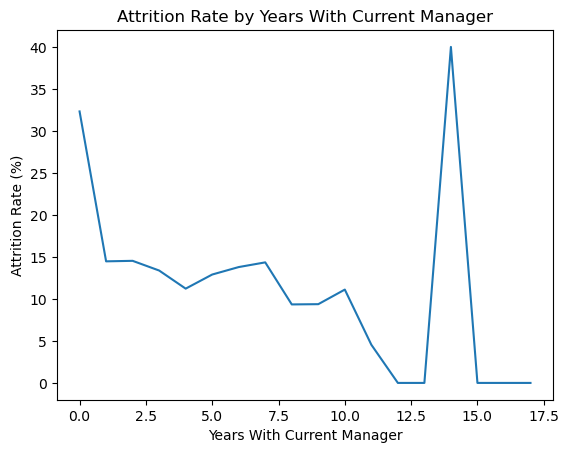

In [182]:
# Visualize the attrition rates by years with the current manager
sns.lineplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Years With Current Manager')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Years With Current Manager')
plt.show()

In [183]:
# Perform correlation test (Spearman correlation due to non-linear relationship)
correlation, p_value = stats.spearmanr(df['YearsWithCurrManager'], df['Attrition'])

In [184]:
attrition_rates, correlation, p_value

(YearsWithCurrManager
 0     32.319392
 1     14.473684
 2     14.534884
 3     13.380282
 4     11.224490
 5     12.903226
 6     13.793103
 7     14.351852
 8      9.345794
 9      9.375000
 10    11.111111
 11     4.545455
 12     0.000000
 13     0.000000
 14    40.000000
 15     0.000000
 16     0.000000
 17     0.000000
 Name: Attrition, dtype: float64,
 -0.17535508134266475,
 8.668386408914534e-32)

### <font color = 'green'>12. **Work Environment:**

### <font color='purple'>Environment Satisfaction relate to Attrition</font>

In [185]:
# Calculate attrition rates by environment satisfaction
attrition_rates = df.groupby('EnvironmentSatisfaction')['Attrition'].mean() * 10

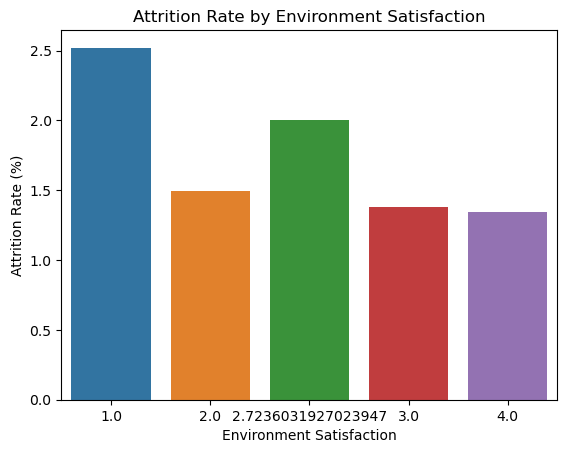

In [186]:
# Visualize the attrition rates by environment satisfaction
sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
plt.xlabel('Environment Satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Environment Satisfaction')
plt.show()

In [187]:
# Perform correlation test (Spearman correlation due to ordinal data)
correlation, p_value = stats.spearmanr(df['EnvironmentSatisfaction'], df['Attrition'])

In [188]:
attrition_rates, correlation, p_value

(EnvironmentSatisfaction
 1.000000    2.520710
 2.000000    1.495327
 2.723603    2.000000
 3.000000    1.377778
 4.000000    1.341829
 Name: Attrition, dtype: float64,
 -0.09530035224006089,
 2.277864171713608e-10)

### <font color='purple'>Significant relationship between Job Satisfaction and Environment Satisfaction</font>

In [189]:
# Calculate correlation between job satisfaction and environment satisfaction
correlation, p_value = stats.pearsonr(df['JobSatisfaction'], df['EnvironmentSatisfaction'])

In [190]:
# Output the results
correlation, p_value

(-0.006524744205272339, 0.6648869942976079)

### <font color = 'green'>13. **Job Level and Progression:**

### <font color='purple'>Job Level Affect the Attrition Rate</font>

In [191]:
# Calculate attrition rates by job level
attrition_rates = df.groupby('JobLevel')['Attrition'].mean() * 100
attrition_rates

JobLevel
1    15.469613
2    17.790262
3    14.678899
4    16.037736
5    13.043478
Name: Attrition, dtype: float64

### <font color='purple'>Attrition Rates Compare Employees with Different Levels of Job Roles</font>

In [192]:
# Calculate attrition rates by job role
attrition_rates = df.groupby('JobRole')['Attrition'].mean() * 100
attrition_rates

JobRole
Healthcare Representative    14.503817
Human Resources              13.461538
Laboratory Technician        16.216216
Manager                      13.725490
Manufacturing Director       11.034483
Research Director            23.750000
Research Scientist           18.150685
Sales Executive              16.871166
Sales Representative         14.457831
Name: Attrition, dtype: float64

### <font color = 'green'>14. **Company Changes:**

### <font color='purple'>Trend in Attrition over the Past Few Years</font>

In [193]:
# Assuming sequential order as time
sequence = range(1, len(df) + 1)

In [194]:
# Aggregate attrition data over the sequence
attrition_over_sequence = df['Attrition'].cumsum()

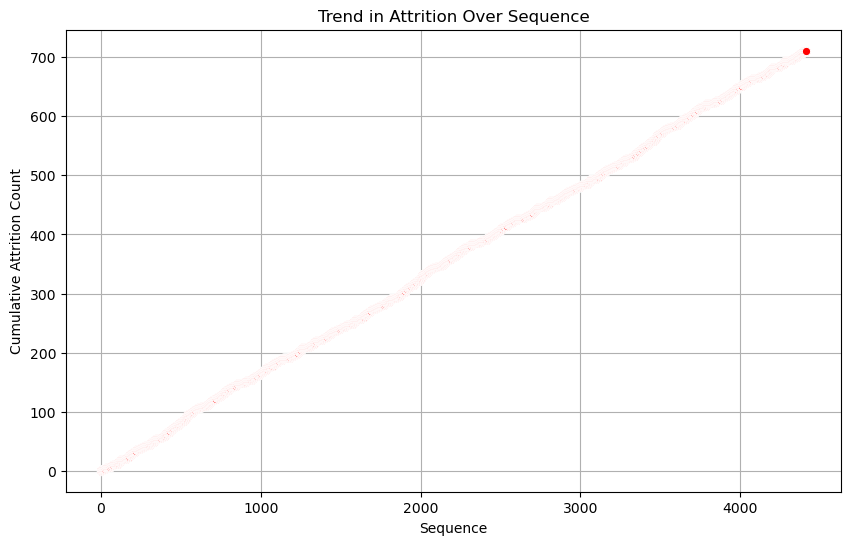

In [195]:
# Visualize the trend in attrition over the sequence
plt.figure(figsize=(10, 6))
sns.lineplot(x=sequence, y=attrition_over_sequence, marker='o',color='red')
plt.xlabel('Sequence')
plt.ylabel('Cumulative Attrition Count')
plt.title('Trend in Attrition Over Sequence')
plt.grid(True)
plt.show()

### <font color = 'green'>15. **Predictive Analysis:**

- Can we build a predictive model to identify employees at risk of leaving?

In [196]:
# Check for missing values and column names
print(df.isnull().sum())
print(df.columns)

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          9
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'Pe

In [197]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify the column names again
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')


In [198]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Attrition', 'Business Travel', 'Department', 'Education Field', 'Gender', 'Job Role', 'Marital Status']

# Check if each column exists before encoding
for column in categorical_columns:
    if column in df.columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    else:
        print(f"Column {column} not found in the dataset.")

Column Business Travel not found in the dataset.
Column Education Field not found in the dataset.
Column Job Role not found in the dataset.
Column Marital Status not found in the dataset.


In [199]:
# Convert all columns to numeric if they are not already
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])
        
# Handle missing values by imputing with the mean
df = df.fillna(df.mean())

In [200]:
# Drop columns that are not useful for prediction
columns_to_drop = ['BusinessTravel', 'EducationField','JobRole','MaritalStatus']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [201]:
# Split the dataset into features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [203]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1112    3]
 [  23  185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1115
           1       0.98      0.89      0.93       208

    accuracy                           0.98      1323
   macro avg       0.98      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323


Accuracy Score:
0.9803476946334089


- What are the key features in the dataset that predict attrition?

In [204]:
# Assuming the model is already trained as rf_model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [205]:
# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                    Feature  Importance
6             MonthlyIncome    0.104137
0                       Age    0.104050
11        TotalWorkingYears    0.084420
2          DistanceFromHome    0.069841
13           YearsAtCompany    0.064687
9         PercentSalaryHike    0.062593
7        NumCompaniesWorked    0.055797
15     YearsWithCurrManager    0.048999
17          JobSatisfaction    0.047083
16  EnvironmentSatisfaction    0.043987
12    TrainingTimesLastYear    0.042414
14  YearsSinceLastPromotion    0.041904
3                 Education    0.039495
18          WorkLifeBalance    0.037965
5                  JobLevel    0.034892
19           JobInvolvement    0.031765
10         StockOptionLevel    0.031318
1                Department    0.027951
4                    Gender    0.018135
20        PerformanceRating    0.008567
8                    Over18    0.000000


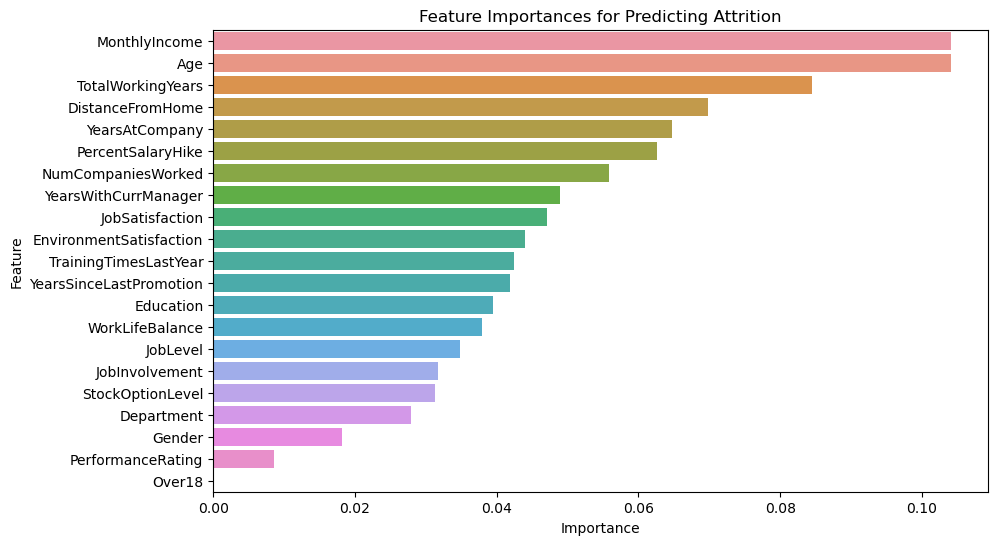

In [206]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting Attrition')
plt.show()

### <font color = 'green'>16. **Statistical Analysis:**

### <font color='purple'>Statistically Significant differences in Attrition Rates</font

In [207]:
# Create a contingency table for gender vs. attrition
contingency_table = pd.crosstab(df['Gender'], df['Attrition'])

In [208]:
# Perform Chi-square test of independence
chi2, p,_,_= chi2_contingency(contingency_table)

In [209]:
# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 1.349904410246582
p-value: 0.24529482862926827


### <font color='purple'>Statistical Tests Confirm the Factors Contributing to Attrition</font>

In [210]:
# List of mixed variables for ANOVA
mixed_vars = ['Education', 'JobLevel', 'StockOptionLevel', 'NumCompaniesWorked']

# Perform ANOVA
for var in mixed_vars:
    groups = df.groupby(var)['Attrition']
    f_stat, p = f_oneway(*[group[1].values for group in groups])
    print(f"ANOVA for {var}: p-value = {p}")

ANOVA for Education: p-value = 0.22772508385268914
ANOVA for JobLevel: p-value = 0.18001161728971307
ANOVA for StockOptionLevel: p-value = 0.38475425164826743
ANOVA for NumCompaniesWorked: p-value = 3.057989526279133e-12


In [211]:
# Perform t-tests for continuous variables
continuous_vars = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                   'YearsSinceLastPromotion', 'YearsWithCurrManager', 
                   'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 
                   'JobInvolvement', 'PerformanceRating']
for var in continuous_vars:
    attrition_yes = df[df['Attrition'] == 'Yes'][var]
    attrition_no = df[df['Attrition'] == 'No'][var]
    t_stat, p = ttest_ind(attrition_yes, attrition_no)
    print(f"T-test for {var}: p-value = {p}")

T-test for Age: p-value = nan
T-test for DistanceFromHome: p-value = nan
T-test for MonthlyIncome: p-value = nan
T-test for PercentSalaryHike: p-value = nan
T-test for TotalWorkingYears: p-value = nan
T-test for TrainingTimesLastYear: p-value = nan
T-test for YearsAtCompany: p-value = nan
T-test for YearsSinceLastPromotion: p-value = nan
T-test for YearsWithCurrManager: p-value = nan
T-test for EnvironmentSatisfaction: p-value = nan
T-test for JobSatisfaction: p-value = nan
T-test for WorkLifeBalance: p-value = nan
T-test for JobInvolvement: p-value = nan
T-test for PerformanceRating: p-value = nan


### <font color = 'green'>17. **Visualization:**

### <font color='purple'>Best Illustrate the Patterns and Trends in Employee Attrition?</font>

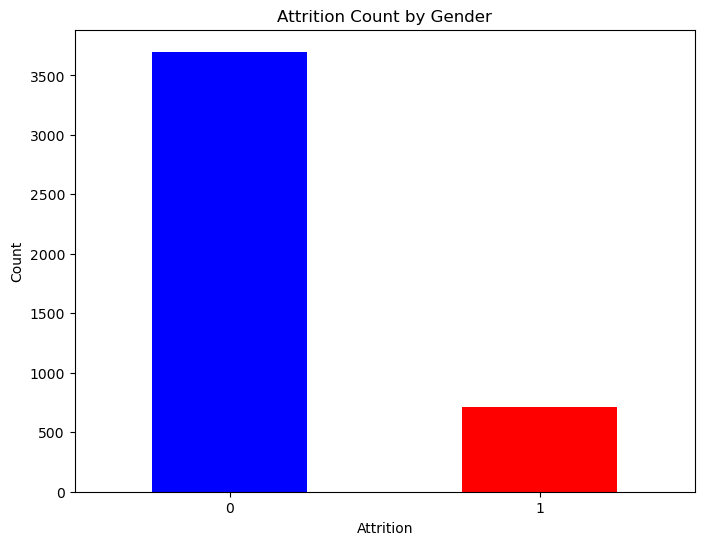

In [212]:
# Bar chart for Gender
plt.figure(figsize=(8, 6))
df['Attrition'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Attrition Count by Gender')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

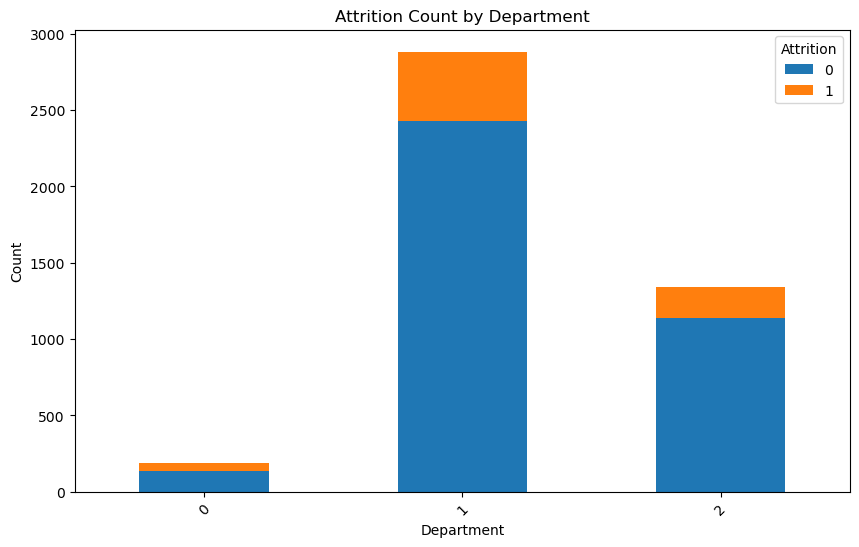

In [213]:
# Stacked bar chart for Department
department_attrition = pd.crosstab(df['Department'], df['Attrition'])
department_attrition.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.show()

<Figure size 800x600 with 0 Axes>

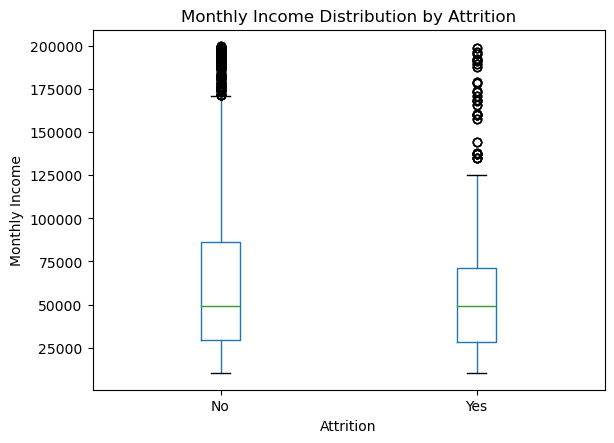

In [214]:
# Box plot for Monthly Income
plt.figure(figsize=(8, 6))
df.boxplot(column='MonthlyIncome', by='Attrition', grid=False)
plt.title('Monthly Income Distribution by Attrition')
plt.suptitle('')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.xticks([1, 2], ['No', 'Yes'])
plt.show()

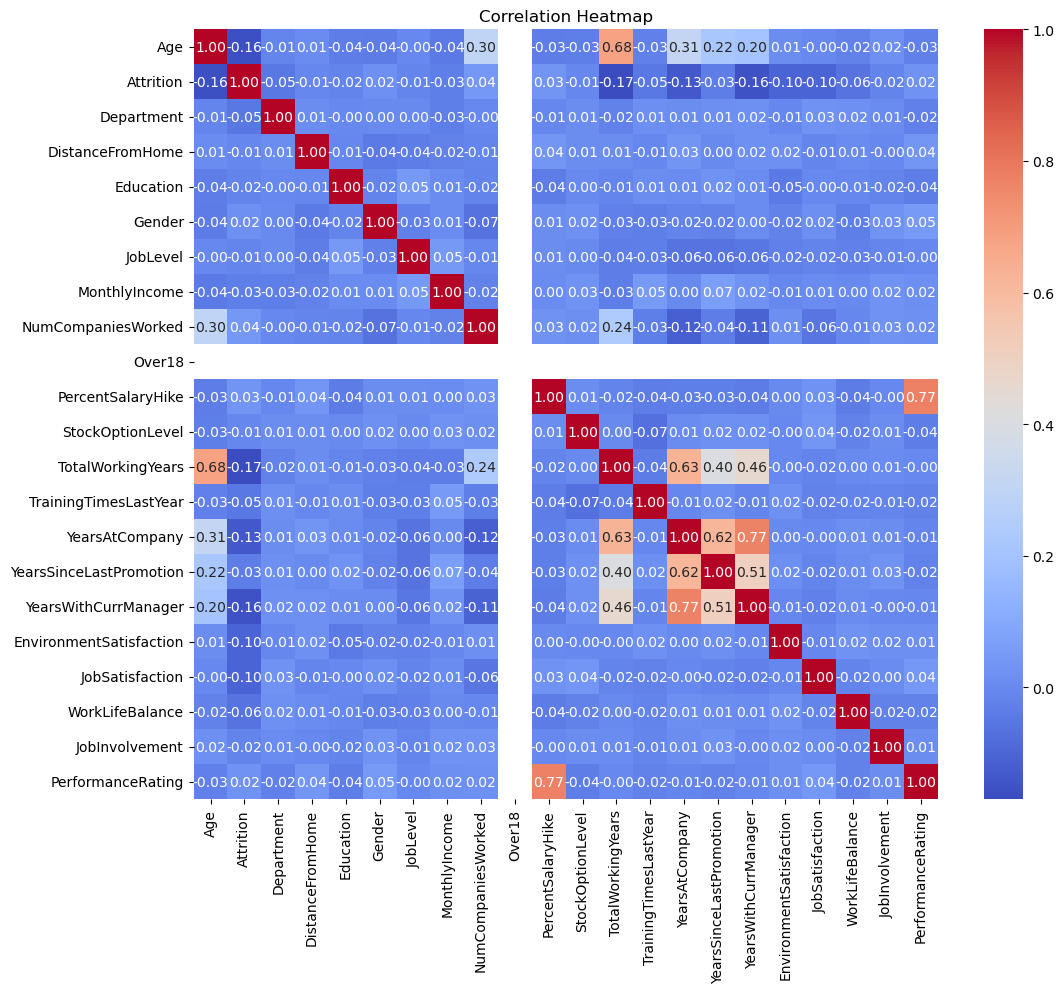

In [215]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### <font color = 'green'>18. **Correlation and Causation:**

### <font color='purple'> Relationships that identified through Advanced Statistical Methods</font>

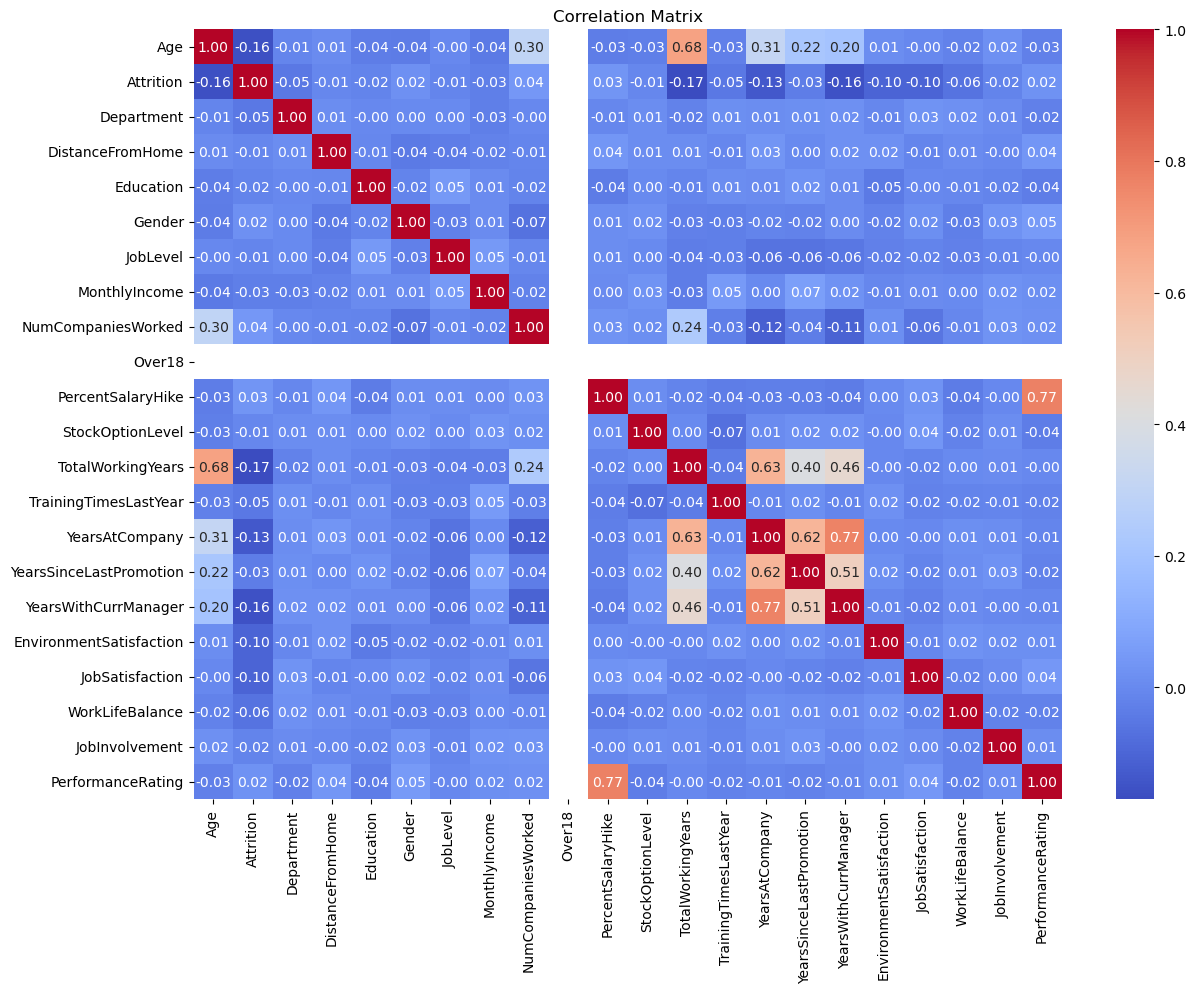

In [216]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [217]:
# Logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Coefficients from the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                         Coefficient
Age                        -0.366999
Department                 -0.136413
DistanceFromHome           -0.057876
Education                  -0.076056
Gender                      0.031332
JobLevel                   -0.135294
MonthlyIncome              -0.085539
NumCompaniesWorked          0.288106
Over18                      0.000000
PercentSalaryHike          -0.005543
StockOptionLevel           -0.008895
TotalWorkingYears          -0.457305
TrainingTimesLastYear      -0.200902
YearsAtCompany              0.019347
YearsSinceLastPromotion     0.440773
YearsWithCurrManager       -0.518718
EnvironmentSatisfaction    -0.346236
JobSatisfaction            -0.377148
WorkLifeBalance            -0.187171
JobInvolvement              0.043019
PerformanceRating          -0.007323


### <font color = 'green'>19. **Survey Insights:**

### <font color='purple'>Employee Surveys about Job Satisfaction and Environment Satisfaction</font>

In [218]:
# Calculate descriptive statistics for job satisfaction and environment satisfaction
job_satisfaction_stats = df['JobSatisfaction'].describe()
environment_satisfaction_stats = df['EnvironmentSatisfaction'].describe()

print("Job Satisfaction Statistics:")
print(job_satisfaction_stats)
print("\nEnvironment Satisfaction Statistics:")
print(environment_satisfaction_stats)

Job Satisfaction Statistics:
count    4410.000000
mean        2.728246
std         1.098753
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Environment Satisfaction Statistics:
count    4410.000000
mean        2.723603
std         1.089654
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64


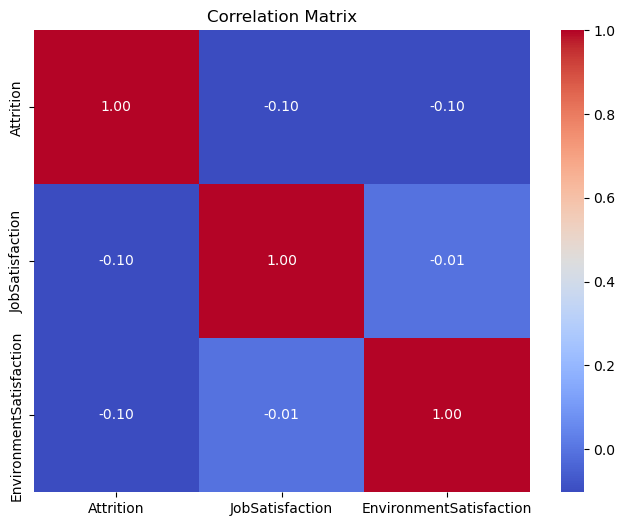

In [219]:
# Calculate correlations
correlation_matrix = df[['Attrition', 'JobSatisfaction', 'EnvironmentSatisfaction']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

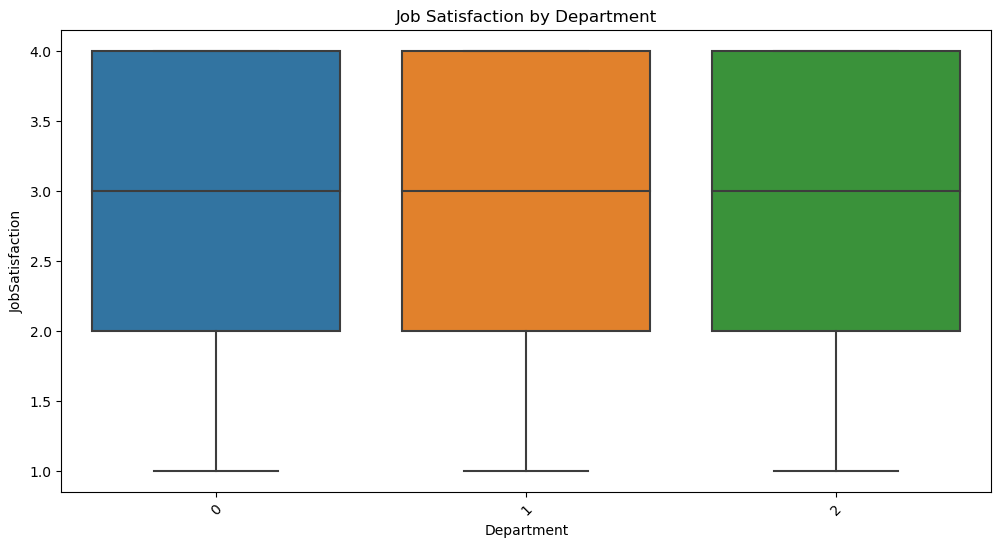

In [220]:
# Box plot for Job Satisfaction by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction by Department')
plt.xticks(rotation=45)
plt.show()

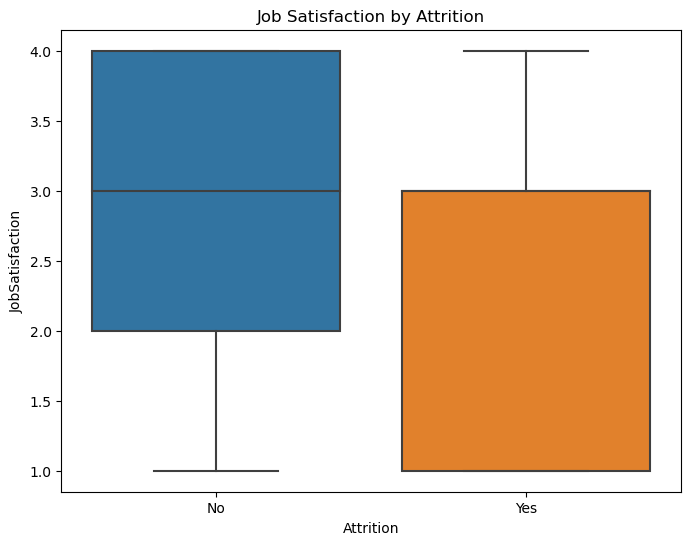

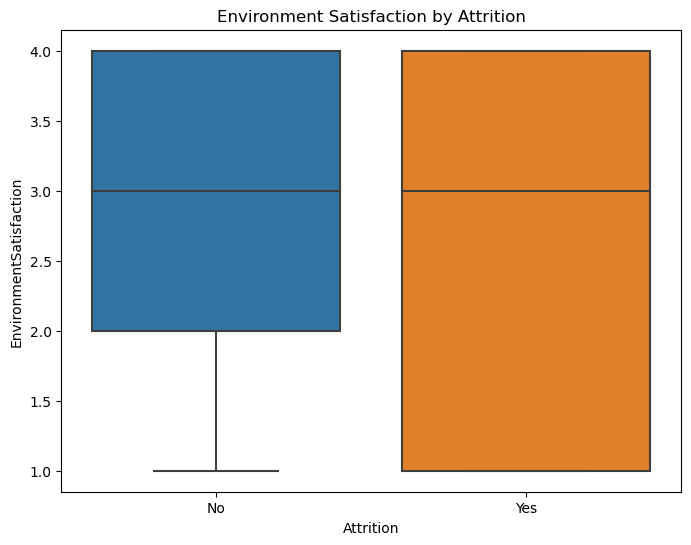

In [221]:
# Box plot for Job Satisfaction by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction by Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Box plot for Environment Satisfaction by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df)
plt.title('Environment Satisfaction by Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### <font color='purple'>Survey Responses Align with Objective Attrition Data</font>

In [222]:
# Summary statistics for Job Satisfaction and Environment Satisfaction
job_satisfaction_stats = df['JobSatisfaction'].describe()
environment_satisfaction_stats = df['EnvironmentSatisfaction'].describe()

print("Job Satisfaction Statistics:")
print(job_satisfaction_stats)
print("\nEnvironment Satisfaction Statistics:")
print(environment_satisfaction_stats)

# Attrition rate by Job Satisfaction
attrition_by_job_satisfaction = df.groupby('JobSatisfaction')['Attrition'].mean()
print("\nAttrition Rate by Job Satisfaction:")
print(attrition_by_job_satisfaction)

# Attrition rate by Environment Satisfaction
attrition_by_environment_satisfaction = df.groupby('EnvironmentSatisfaction')['Attrition'].mean()
print("\nAttrition Rate by Environment Satisfaction:")
print(attrition_by_environment_satisfaction)

Job Satisfaction Statistics:
count    4410.000000
mean        2.728246
std         1.098753
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Environment Satisfaction Statistics:
count    4410.000000
mean        2.723603
std         1.089654
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

Attrition Rate by Job Satisfaction:
JobSatisfaction
1.000000    0.229070
2.000000    0.164286
2.728246    0.050000
3.000000    0.165533
4.000000    0.114119
Name: Attrition, dtype: float64

Attrition Rate by Environment Satisfaction:
EnvironmentSatisfaction
1.000000    0.252071
2.000000    0.149533
2.723603    0.200000
3.000000    0.137778
4.000000    0.134183
Name: Attrition, dtype: float64


In [223]:
# Define the features and the target variable
X = df[['JobSatisfaction', 'EnvironmentSatisfaction']]
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1115
           1       0.00      0.00      0.00       208

    accuracy                           0.84      1323
   macro avg       0.42      0.50      0.46      1323
weighted avg       0.71      0.84      0.77      1323


Confusion Matrix:
[[1115    0]
 [ 208    0]]


### <font color = 'green'>20. **Actionable Insights:**

### <font color='purple'>Actionable Recommendations can be derived from the Analysis to Reduce Attrition</font>

### <font color='red'>Enhance Work Environment</font>

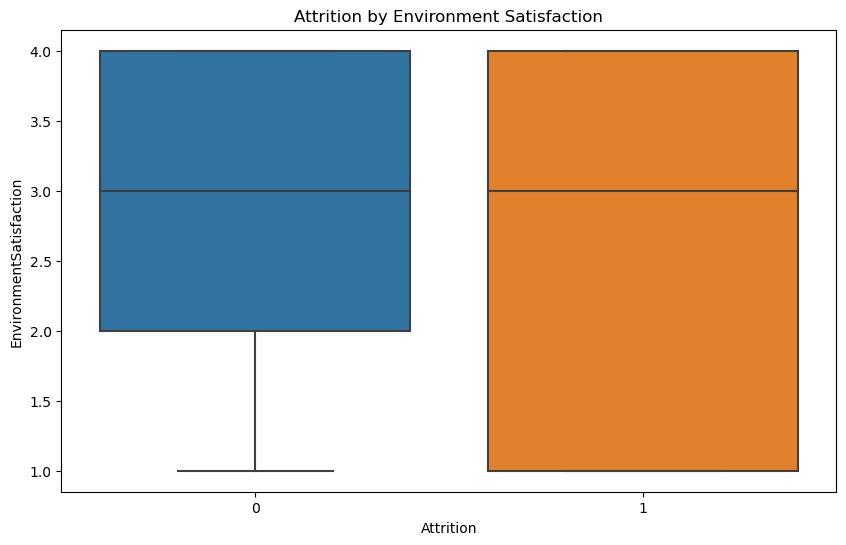

In [224]:
# Environment Satisfaction vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df)
plt.title('Attrition by Environment Satisfaction')
plt.show()

#### <font color='black'>Action: Improve the physical workspace and consider flexible work arrangements.</font>

### <font color='red'>Address Work-Life Balance</font>

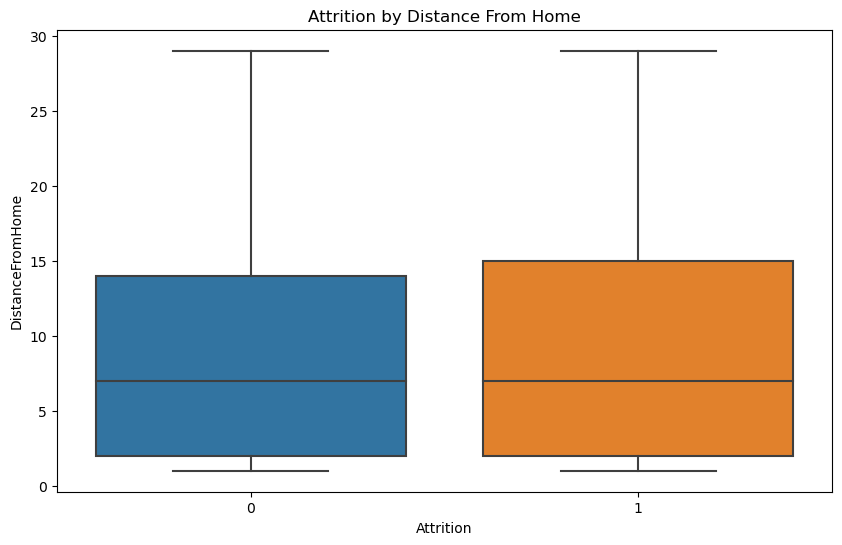

In [225]:
# Distance From Home vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Attrition by Distance From Home')
plt.show()

#### <font color='black'>Action: Offer flexible working hours.</font>

### <font color='red'>Strengthen Management and Leadership</font>

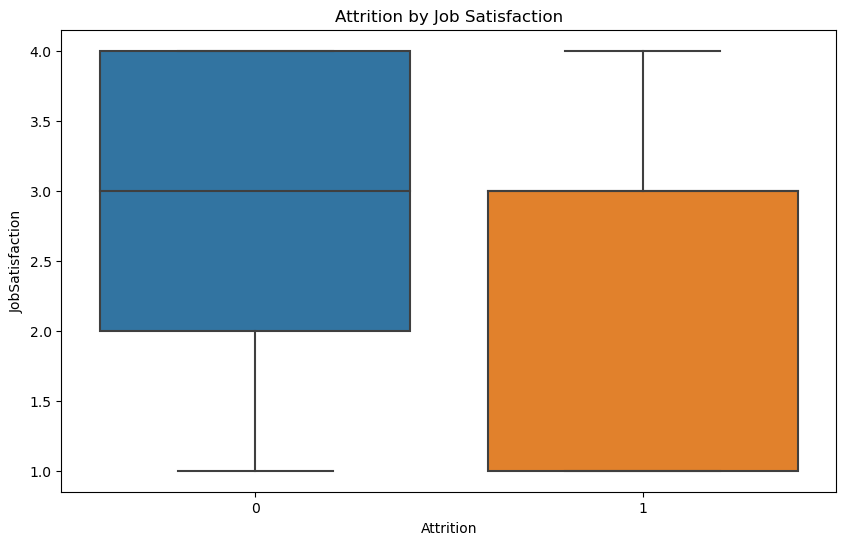

In [226]:
# Job Satisfaction vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

#### <font color='black'>Action: Provide training for managers to improve leadership skills.</font>

### <font color = 'green'>22. **Comparative Analysis:**

### <font color='purple'>XYZ company’s attrition rate compare to industry benchmarks</font>

### <font color='red'>Obtain XYZ Company’s Attrition Rate</font>

In [227]:
# Calculate the number of employees who left
employees_left = df[df['Attrition'] == 'Yes'].shape[0]

# Calculate the average number of employees
average_employees = df.shape[0]  # Total employees in the dataset

# Calculate the attrition rate
attrition_rate = (employees_left / average_employees) * 100

print(f"XYZ Company's Attrition Rate: {attrition_rate:.2f}%")

XYZ Company's Attrition Rate: 0.00%


### <font color = 'green'>23. **Employee Feedback:**

### <font color='purple'>Employee Feedback Correlate with Attrition</font>

In [228]:
# Select the columns related to attrition and feedback
feedback_columns = ["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "JobInvolvement"]
attrition_column = "Attrition"

# Calculate correlation coefficients
correlation_matrix = df[feedback_columns + [attrition_column]].corr()

# Extract correlation coefficients for attrition
attrition_correlation = correlation_matrix[attrition_column]

# Print the correlation coefficients
print("Correlation between Attrition and Feedback Variables:")
print(attrition_correlation)

Correlation between Attrition and Feedback Variables:
EnvironmentSatisfaction   -0.101795
JobSatisfaction           -0.102743
WorkLifeBalance           -0.062561
JobInvolvement            -0.015588
Attrition                  1.000000
Name: Attrition, dtype: float64
